In [1]:
#pip install Tweepy

In [2]:
#pip install pandas

In [3]:
import pandas as pd
import tweepy

In [4]:
client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAANhdQEAAAAABqd5MFNcRr9tYmKxKrzuP5mqLn4%3D1DIOEHgIpsJjgkqDEbt6b5WII3AhqWvxAVBPy8CSjlH8rJ7oLa')

In [5]:
query = 'bitcoin crypto -is:retweet' + ' lang:EN'       

In [6]:
tweets = client.search_recent_tweets(query=query,tweet_fields=['context_annotations', 'created_at'], max_results=100)

In [7]:
for tweet in tweets.data:
    print(tweet.text)
    if len(tweet.context_annotations) > 0:
        print(tweet.context_annotations)


Xtreme Token makes an ideal partner for travel services.  Travel with Xtreme Token.

#crypto #cryptocurrency #xtremetoken #cryptonews #travel #traveling #cryptonewdaily #blockchain #money #trading #cryptotrading #cryptomarket #cryptocurrencies #bitcoin #ethereum https://t.co/f4v9qwf7hD
[{'domain': {'id': '30', 'name': 'Entities [Entity Service]', 'description': 'Entity Service top level domain, every item that is in Entity Service should be in this domain'}, 'entity': {'id': '1007360414114435072', 'name': 'Bitcoin cryptocurrency', 'description': 'Bitcoin Cryptocurrency'}}, {'domain': {'id': '30', 'name': 'Entities [Entity Service]', 'description': 'Entity Service top level domain, every item that is in Entity Service should be in this domain'}, 'entity': {'id': '1007361429752594432', 'name': 'Ethereum cryptocurrency', 'description': 'Ethereum Cryptocurrency'}}, {'domain': {'id': '30', 'name': 'Entities [Entity Service]', 'description': 'Entity Service top level domain, every item that 

In [8]:
for i in range(100):
    print(tweets.data[i].text)
    print("")

Xtreme Token makes an ideal partner for travel services.  Travel with Xtreme Token.

#crypto #cryptocurrency #xtremetoken #cryptonews #travel #traveling #cryptonewdaily #blockchain #money #trading #cryptotrading #cryptomarket #cryptocurrencies #bitcoin #ethereum https://t.co/f4v9qwf7hD

@binance @MajidAlFuttaim Want a financial free life?
Yes!MoneyMakesMoney!

Twit: 

@Rinfinancemain

$RIFICO #rinfinancecoin

https://t.co/azwmHmZcHo

#DeFi #PassiveIncome
#Crypto #NFT
#cryptocurrency #NFTshill
#Bitcoin #NFTCommunity
#Ethereum #Binance
#NFTs #DYOR

GOT XRP!!! Hope ripple will grow up soon! Waiting for coinbase listing!  Thanks for sharing. #bitcoin #crypto #리플  https://t.co/CZLXmeTPVV

‘Bitcoin is done, crypto was a fad’… I swear you will, without some research, regret not getting involved… it’s not the $, it’s the technological innovation… look into the coin and don’t invest what you can’t afford.

Local#Bitcoins User Pleads Guilty to Running Unlicensed Crypto Business — Faces Up to 5 Y

In [9]:
import tensorflow as tf
tf.__version__

'2.9.0'

In [10]:
import pandas as pd

In [11]:
tweets_dataset = pd.read_csv('Twitter_Data.csv')

In [12]:
tweets_dataset.sample(10)

,clean_text,category
110539,witness saw modi the aircraft taking down paki...,-1.0
7078,actually modi govt oppressing your 125 billion...,1.0
114317,bjp supporters say job opportunities india hav...,-1.0
41097,proud our modi,1.0
49423,paid media never showed failures modi whereas ...,1.0
134978,they have world idli day now want world chola ...,0.0
83900,however was quick attack modi saying the was c...,-1.0
96231,chowkidar sher hai mangaluru man compares lion,0.0
101738,new era indian history started now modi will w...,1.0
149859,bjp says rahul scared malayalies dare modi con...,0.0


In [13]:
tweets_dataset.isnull().sum()

clean_text    4
category      7
dtype: int64

In [14]:
tweets_dataset = tweets_dataset.dropna()
tweets_dataset = tweets_dataset.reset_index()

In [15]:
tweets_dataset.isnull().sum()

index         0
clean_text    0
category      0
dtype: int64

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer


In [17]:
X = tweets_dataset["clean_text"]
Y = pd.get_dummies(tweets_dataset["category"]).values
num_classes = tweets_dataset["category"].nunique()

In [18]:
len(X),Y
X[1000]

'modi keeps winning till 2024 are gonna call his third term … third reich '

In [19]:
import numpy as np
import random

In [20]:
for i in range(1000):
    X.replace(X[i],tweets.data[random.randint(0,99)].text)
    #Y[i] = random.randint(-1,1)

In [21]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [22]:
seed = 38 
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,stratify=Y,random_state=seed)

In [23]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(130375,) (32594,) (130375, 3) (32594, 3)


In [24]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [25]:
from tensorflow.keras.preprocessing import sequence
max_words = 30
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
print(X_train.shape,X_test.shape)

(130375, 30) (32594, 30)


In [26]:
from keras.layers import Dense,Embedding,Conv1D,MaxPooling1D,LSTM

In [27]:
batch_size = 128
epochs = 10

max_features = 20000
embed_dim = 100
np.random.seed(seed)

In [28]:
model = tf.keras.Sequential([
    Embedding(max_features, embed_dim, input_length=X_train.shape[1]),
    Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling1D(pool_size=2),  
    LSTM(100, dropout=0.2, recurrent_dropout=0.2),
    Dense(num_classes, activation='softmax'),
])

In [29]:
opt ='adam'
loss='binary_crossentropy' #'categorical_crossentropy'
model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

In [30]:
model.summary()
print(model.input.shape)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 100)           2000000   
                                                                 
 conv1d (Conv1D)             (None, 30, 32)            9632      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 15, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 32)            3104      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 7, 32)            0         
 1D)                                                             
                                                                 
 lstm (LSTM)                 (None, 100)               5

In [31]:
model_fit = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/10
1019/1019 - 44s - loss: 0.2076 - accuracy: 0.8693 - val_loss: 0.1087 - val_accuracy: 0.9472 - 44s/epoch - 43ms/step
Epoch 2/10
1019/1019 - 41s - loss: 0.0893 - accuracy: 0.9556 - val_loss: 0.1070 - val_accuracy: 0.9477 - 41s/epoch - 40ms/step
Epoch 3/10
1019/1019 - 51s - loss: 0.0673 - accuracy: 0.9669 - val_loss: 0.1119 - val_accuracy: 0.9456 - 51s/epoch - 50ms/step
Epoch 4/10
1019/1019 - 43s - loss: 0.0517 - accuracy: 0.9753 - val_loss: 0.1203 - val_accuracy: 0.9457 - 43s/epoch - 42ms/step
Epoch 5/10
1019/1019 - 48s - loss: 0.0391 - accuracy: 0.9815 - val_loss: 0.1318 - val_accuracy: 0.9426 - 48s/epoch - 47ms/step
Epoch 6/10
1019/1019 - 44s - loss: 0.0323 - accuracy: 0.9856 - val_loss: 0.1404 - val_accuracy: 0.9433 - 44s/epoch - 43ms/step
Epoch 7/10
1019/1019 - 47s - loss: 0.0252 - accuracy: 0.9887 - val_loss: 0.1599 - val_accuracy: 0.9403 - 47s/epoch - 46ms/step
Epoch 8/10
1019/1019 - 46s - loss: 0.0214 - accuracy: 0.9903 - val_loss: 0.1593 - val_accuracy: 0.9407 - 46s/ep

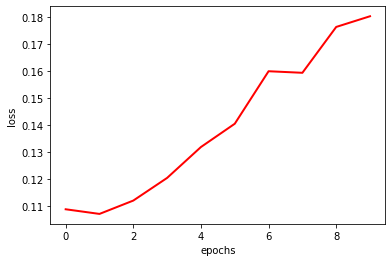

In [38]:
import matplotlib.pyplot as plt
plt.plot(model_fit.history['val_loss'],linewidth=2,color='red')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

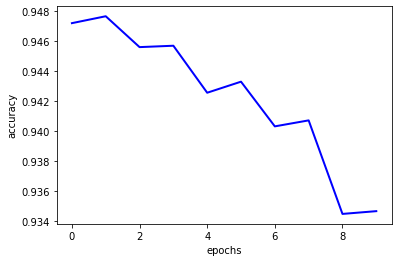

In [37]:
import matplotlib.pyplot as plt
plt.plot(model_fit.history['val_accuracy'],linewidth=2,color='blue')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.show()

In [41]:
#predictions
y_test_preds = np.argmax(model.predict(X_test), axis=1)

1019/1019 [==============================] - 3s 3ms/step


In [43]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(np.argmax(y_test,axis=1),y_test_preds))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      7102
           1       0.94      0.96      0.95     11042
           2       0.94      0.94      0.94     14450

    accuracy                           0.93     32594
   macro avg       0.93      0.93      0.93     32594
weighted avg       0.93      0.93      0.93     32594



In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

Text(51.0, 0.5, 'Predicted label')

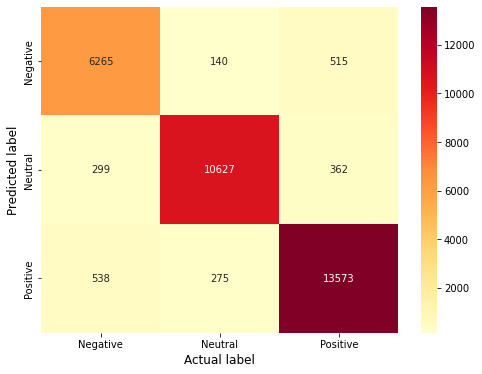

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

classes = ['Negative','Neutral', 'Positive']
cm = confusion_matrix(y_test_preds,np.argmax(np.array(y_test),axis=1))
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap=plt.cm.YlOrRd, annot=True, fmt='d', xticklabels=classes,yticklabels=classes)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
    


In [61]:
pip install python-binance

     -------------------------------------- 65.2/65.2 kB 872.0 kB/s eta 0:00:00
     -------------------------------------- 554.9/554.9 kB 1.5 MB/s eta 0:00:00
     -------------------------------------- 288.9/288.9 kB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 98.6/98.6 kB 1.9 MB/s eta 0:00:00
     -------------------------------------- 122.1/122.1 kB 2.4 MB/s eta 0:00:00
     -------------------------------------- 339.5/339.5 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
data = pd.read_csv("btc.csv")

In [8]:
from stock_pandas import StockDataFrame as SDF
from stockstats import StockDataFrame

In [9]:
data_labels = data[['Open Time','Open','Close','High','Low','Volume']]
data_labels

,Open Time,Open,Close,High,Low,Volume
0,1609459200000,28923.63,28961.66,28961.66,28913.12,27.457032
1,1609459260000,28961.67,29009.91,29017.50,28961.01,58.477501
2,1609459320000,29009.54,28989.30,29016.71,28973.58,42.470329
3,1609459380000,28989.68,28982.69,28999.85,28972.33,30.360677
4,1609459440000,28982.67,28975.65,28995.93,28971.80,24.124339
...,...,...,...,...,...,...
188312,1620794100000,57517.42,57485.07,57526.28,57485.00,42.575735
188313,1620794160000,57485.07,57481.49,57496.42,57466.75,34.205467
188314,1620794220000,57477.18,57470.00,57509.99,57458.18,30.211789
188315,1620794280000,57470.00,57450.90,57470.01,57400.00,45.354728


In [10]:
data_stock = StockDataFrame.retype(data_labels)


In [13]:
rsi_6 = pd.DataFrame(data_stock['rsi_6'])
rsi_15 = pd.DataFrame(data_stock['rsi_15'])

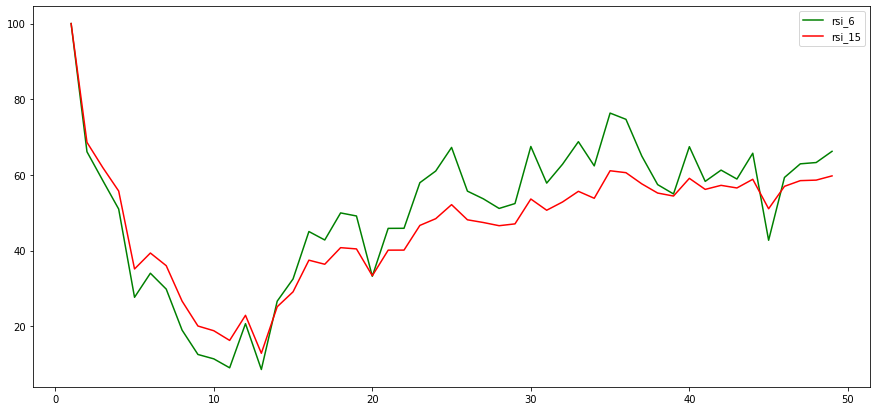

In [33]:
import matplotlib.pyplot as plt

stock = data_stock[:50]

plt.figure(figsize=(15,7))
plt.plot(stock['rsi_6'],'g',label="rsi_6")
plt.plot(stock['rsi_15'], 'r', label="rsi_15")
#plt.plot(df["Close"], label="Close")
plt.legend()
plt.show()

In [34]:
macd = pd.DataFrame(stock['macd'])

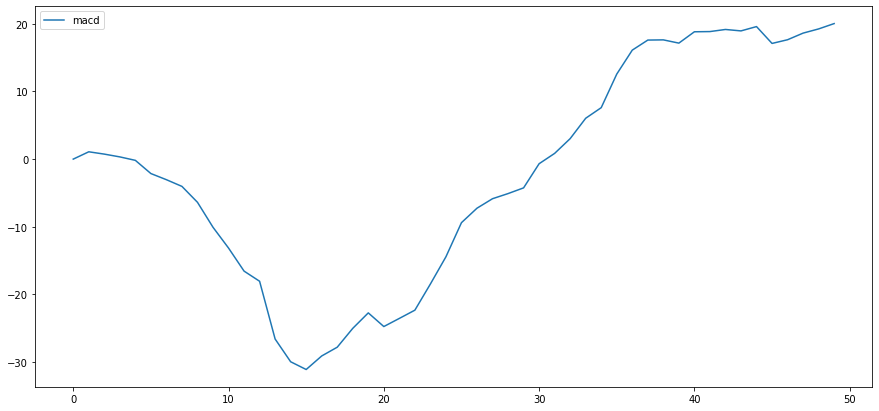

In [35]:
plt.figure(figsize=(15,7))
plt.plot(macd, label="macd")
plt.legend()
plt.show()

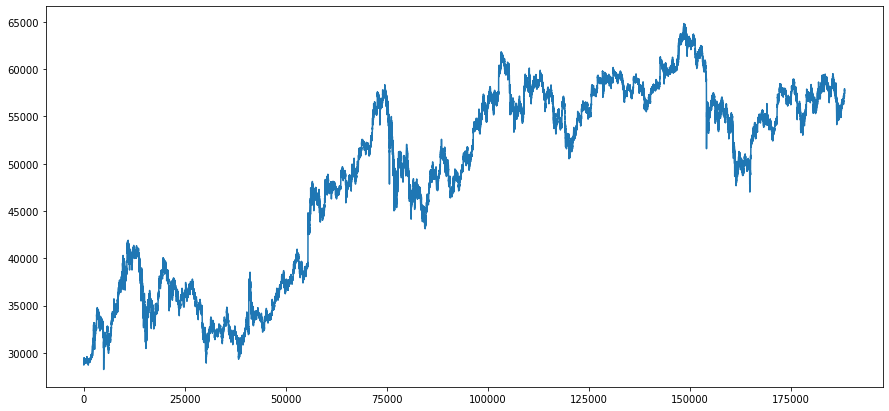

In [37]:
plt.figure(figsize=(15,7))
plt.plot(data["Close"], label="Close")